# Iris Classifier model : Tensorflow

In [2]:
# Import libraries :
import tensorflow as tf
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

In [3]:
# load iris dataset :
df = datasets.load_iris()
# find the features and target values :
X = df.data
y = df.target

In [4]:
# Data splitting 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [5]:
# Standardize the data :
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
# Build Simple Nural Network :
model = tf.keras.Sequential([tf.keras.layers.Dense(64, activation = 'relu', input_shape = (X_train.shape[1],))
                             ,tf.keras.layers.Dense(4, activation = 'softmax')
                            ])

In [7]:
# Model compile :
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [8]:
# Train the model :
model.fit(X_train, y_train, epochs = 50, batch_size = 20, validation_data = (X_test, y_test))

Epoch 1/50
6/6 [==============================] - 2s 99ms/step - loss: 1.6266 - accuracy: 0.1917 - val_loss: 1.6373 - val_accuracy: 0.1667
Epoch 2/50
6/6 [==============================] - 0s 20ms/step - loss: 1.4995 - accuracy: 0.1917 - val_loss: 1.4994 - val_accuracy: 0.1333
Epoch 3/50
6/6 [==============================] - 0s 19ms/step - loss: 1.3801 - accuracy: 0.2000 - val_loss: 1.3697 - val_accuracy: 0.1333
Epoch 4/50
6/6 [==============================] - 0s 16ms/step - loss: 1.2715 - accuracy: 0.3333 - val_loss: 1.2499 - val_accuracy: 0.4667
Epoch 5/50
6/6 [==============================] - 0s 19ms/step - loss: 1.1701 - accuracy: 0.4917 - val_loss: 1.1402 - val_accuracy: 0.4667
Epoch 6/50
6/6 [==============================] - 0s 18ms/step - loss: 1.0760 - accuracy: 0.4750 - val_loss: 1.0419 - val_accuracy: 0.4333
Epoch 7/50
6/6 [==============================] - 0s 17ms/step - loss: 0.9930 - accuracy: 0.5167 - val_loss: 0.9542 - val_accuracy: 0.5667
Epoch 8/50
6/6 [===========

In [9]:
# Evaluation :
accuracy = model.evaluate(X_test, y_test)
accuracy

1/1 [==============================] - 0s 50ms/step - loss: 0.2066 - accuracy: 0.9667


[0.2065618336200714, 0.9666666388511658]

# Iris Classifier model : Scikit-Learn

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df = pd.read_csv('Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [12]:
df = df.drop(columns = ['Id'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [13]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [15]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [16]:
# PREPROCESS THE DATA :

In [17]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [18]:
# ANALYSIS OF DATA :

<AxesSubplot:>

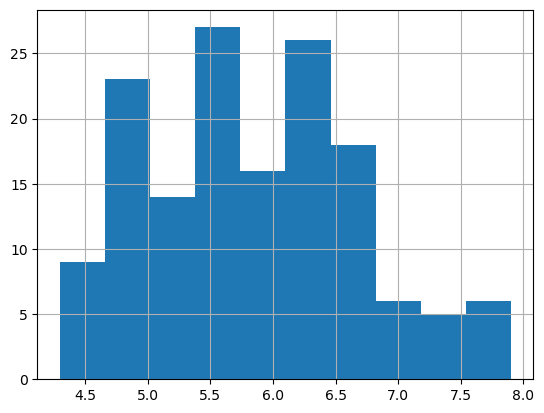

In [19]:
df['SepalLengthCm'].hist()

<AxesSubplot:>

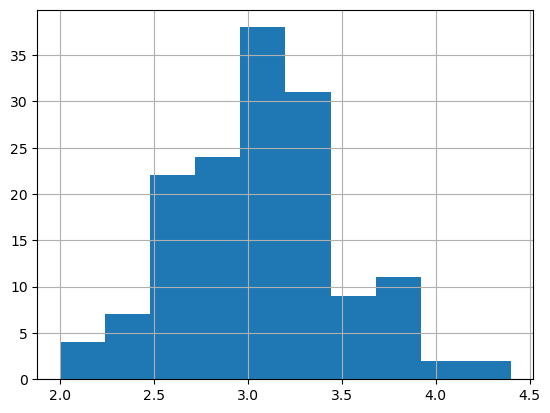

In [20]:
df['SepalWidthCm'].hist()

<AxesSubplot:>

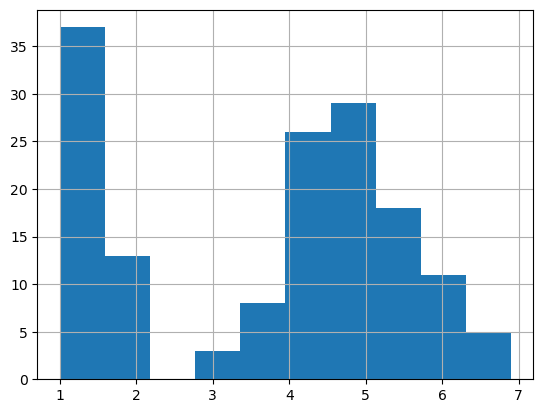

In [21]:
df['PetalLengthCm'].hist()

<AxesSubplot:>

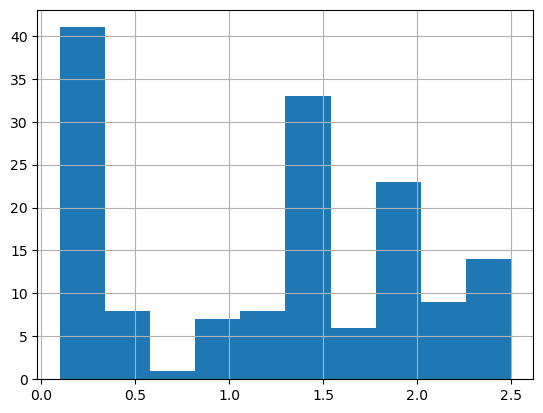

In [22]:
df['PetalWidthCm'].hist()

In [23]:
# Create list of colors and class labels :

colors = ['red', 'green', 'blue']
species = ['verginica', 'setosa', 'versicolor']

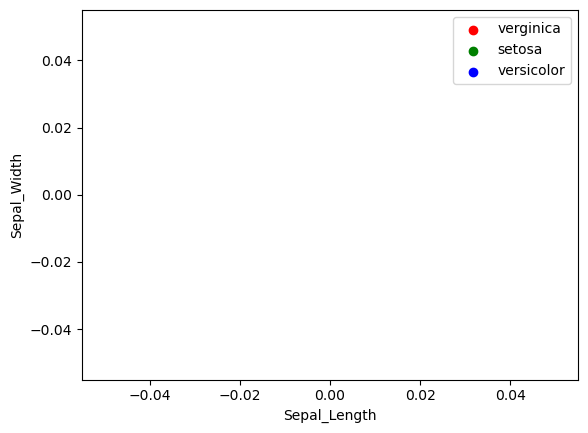

In [24]:
# Scatter plot : Sepal_Length

for i in range(3):
    x = df[df['Species']==species[i]]
    plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c=colors[i], label=species[i])

plt.xlabel('Sepal_Length')
plt.ylabel('Sepal_Width')
plt.legend()
plt.show()

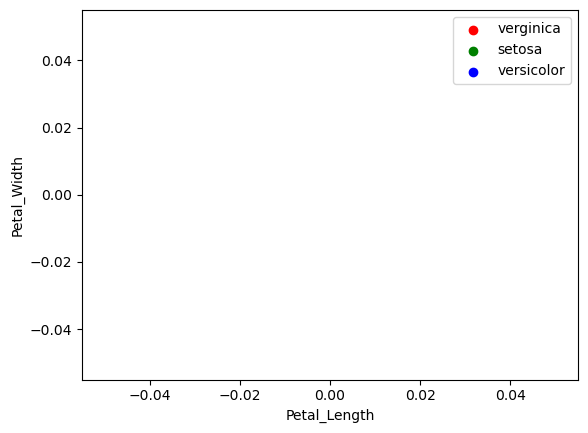

In [25]:
# Scatter plot : Petal_length

for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['PetalLengthCm'],x['PetalWidthCm'], c = colors[i], label = species[i])
plt.xlabel('Petal_Length')
plt.ylabel('Petal_Width')
plt.legend()
plt.show()

In [26]:
# CORRELATION MATRIX :
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

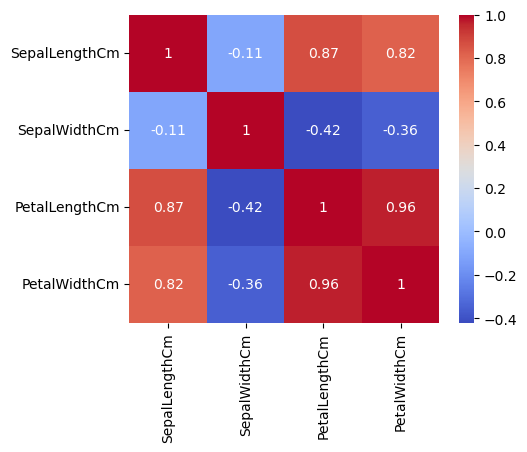

In [27]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(corr, annot=True, ax=ax, cmap='coolwarm')

In [28]:
# MODEL TRAINING AND TESTING :

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import pickle

In [30]:
# Features
X = df.drop(columns=['Species'])
# Target Value 
Y = df['Species']

In [31]:
# Data split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)

In [32]:
# fit the data into model
model = KNeighborsClassifier()
model.fit(x_train.values, y_train.values)

KNeighborsClassifier()

In [33]:
# Accuracy of model
print('Accuracy :', model.score(x_test, y_test)*100)

Accuracy : 100.0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
